# Manejo de las Respuestas JSON de las APIs

En esta lección vamos a aprender a manipular las **respuestas** que recibimos al hacer una **solicitud API**, para que sepas cómo utilizar la información que recibes, y cómo **incorporarla a tus análisis** de Data Science.

Para realizar esta práctica usaremos el [sitio de jsonplaceholders](https://jsonplaceholder.typicode.com/posts/1) que no es otra cosa que una web para hacer **prácticas con APIs**. Este sitio básicamente tiene texto, que está escrito en un formato que, a simple vista, parece ser un diccionario que representa un post que contiene cuatro claves: `userId`, `id`, `title`, y `body`.

Vamos a implementar una API que nos permita **extraer esta información**. Para acceder a esta información solo necesito la **url**, ya que este sitio no pide una clave API.

In [1]:
import requests

In [2]:
url = "https://jsonplaceholder.typicode.com/posts/1"

Ahora configuramos a `requests` para hacer el pedido.

In [3]:
respuesta = requests.get(url)
type(respuesta)

requests.models.Response

Los objetos de tipo `Response` son **respuestas HTTP** que contienen mucha información, y no solamente los datos que hemos pedido. Ya vamos a ver eso más adelante.

Por ahora, usemos el método `json()` para transformar esa información en algo que python pueda entender.

In [4]:
data = respuesta.json()

Veamos qué contiene `data`.

In [5]:
data

{'userId': 1,
 'id': 1,
 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}

Entonces lo que tenemos ahora es un **diccionario**, y ciértamente python puede hacer muchas cosas con los diccionarios, y tu también, como por ejemplo, **indexarlos** por sus claves.

In [6]:
data["title"]

'sunt aut facere repellat provident occaecati excepturi optio reprehenderit'

Si quiero preservar esta información, simplemente puedo guardarla en una **variable**.

In [7]:
titulo1 = data["title"]
type(titulo1)

str

Ahora tenemos un **string**, y si quisiéramos manipular esta información, lo único que tendríamos que hacer es usar los métodos de string, y listo. Ya hemos usado la API, y si quisiéramos seguir trabajando con esta información solo necesitamos implementar los recursos de python. La API ya ha cumplido su trabajo para ese ejemplo en particular.

### Otro ejemplo con el mismo sitio

Ahora veamos un ejemplo más amplio, para ver cómo hacer Data Science básica con la información recibida.

Esta vez usaremos [esta url](https://jsonplaceholder.typicode.com/posts/) que contiene todos los posts ficticios.

Ahora vemos que tenemos una **lista** que contiene muchos **diccionarios**, y cada diccionario es un post con su información. Vamos a cargar toda esa información en la variable `data2`.

In [8]:
url2 = "https://jsonplaceholder.typicode.com/posts/"
respuesta2 = requests.get(url2)
data2 = respuesta2.json()
data2

[{'userId': 1,
  'id': 1,
  'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
  'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'},
 {'userId': 1,
  'id': 2,
  'title': 'qui est esse',
  'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'},
 {'userId': 1,
  'id': 3,
  'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut',
  'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'},
 {'userId': 1,
  'id': 4,
  'title': 'eum et est occaecati',
  'body': 'ullam et saepe reiciendis voluptatem adipisci\nsit amet autem assumenda provid

Este es el contenido de `data2`, y ahora supongamos que quiero guardar por separado todos los datos de `userId` para hacer una visualización.

Para saber qué métodos aplicar sobre `data2`, necesito saber con qué **tipo de dato** estoy trabajando aquí.

In [9]:
type(data2)

list

Bien, si tengo una **lista**, eso significa que puedo **iterar** en esta lista usando un loop `for`, e ir extrayendo los valores de `userId` de cada uno de los posts, y guardarlos en una lista aparte.

In [10]:
usuarios = []

for post in data2:
    usuarios.append(post["userId"])

usuarios

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

¿Puedo ahora transformar esta **lista** en una **Serie** de Pandas?

In [11]:
import pandas as pd

miSerie = pd.Series(usuarios)
miSerie

0      1
1      1
2      1
3      1
4      1
      ..
95    10
96    10
97    10
98    10
99    10
Length: 100, dtype: int64

Genial. ¿Puedo hacer una **visualización** con estos datos que originalmente estaban en un sitio web?

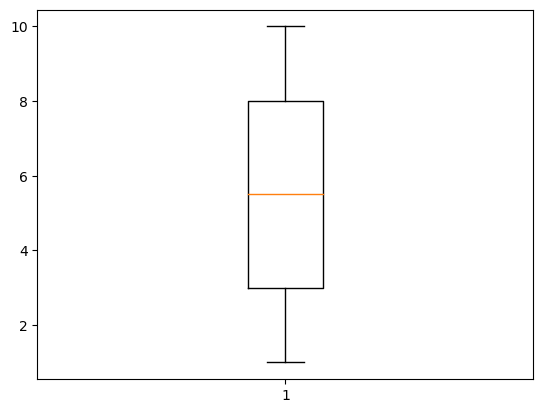

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(usuarios);

En esta lección has visto cómo manejar las respuestas que recibes de tus solicitudes API para poder usarlas en tus análisis de Data Science.

Espero que estés entusiasmado con todo esto, porque se viene mucho más.